In [35]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the time module.
import time


# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=fae06789b88cd77d413e0abc50acf1e5


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

kapaa us
hobart au
kapaa us
beringovskiy ru
rikitea pf
castro cl
east london za
lompoc us
ampanihy mg
jamestown sh
barrow us
ushuaia ar
sovetskiy ru
iranshahr ir
mizan teferi et
kazachinskoye ru
hermanus za
thompson ca
san jose del palmar co
vaitupu wf
viking ca
cape town za
rikitea pf
mahebourg mu
port alfred za
busselton au
los llanos de aridane es
dowa mw
lebu cl
albany au
new norfolk au
jamestown sh
new norfolk au
lasa cn
tuktoyaktuk ca
new norfolk au
gidam in
thompson ca
natal br
port elizabeth za
mount isa au
boende cd
dauriya ru
havre-saint-pierre ca
egvekinot ru
tsihombe mg
hasaki jp
khatanga ru
butaritari ki
saint-joseph re
nizhneyansk ru
faranah gn
bluff nz
provideniya ru
hermanus za
albany au
san patricio mx
constitucion mx
hobart au
grindavik is
kieta pg
rikitea pf
nikolskoye ru
taolanaro mg
bredasdorp za
aguimes es
victoria sc
aksha ru
jamestown sh
cape town za
banda aceh id
ushuaia ar
ushuaia ar
burica pa
baykit ru
bathsheba bb
faanui pf
dunga bunga pk
mataura pf
grand ga

evensk ru
rikitea pf
taolanaro mg
albany au
busselton au
vaini to
barrow us
airai pw
severo-kurilsk ru
castro cl
carnarvon au
hermanus za
punta arenas cl
ushuaia ar
barrow us
elizabeth city us
hobart au
douglas us
urucui br
san patricio mx
sao jose da coroa grande br
victoria sc
ostersund se
kavieng pg
torbay ca
port hardy ca
samusu ws
kodiak us
narsaq gl
barrow us
villa maria ar
ketchikan us
mataura pf
katsuura jp
fomboni km
ghanzi bw
tsihombe mg
ruatoria nz
vaini to
hualmay pe
sangar ru
hilo us
albany au
butaritari ki
vaini to
provideniya ru
hambantota lk
victoria sc
punta arenas cl
butaritari ki
hilo us
togur ru
cape town za
abbeville us
tumannyy ru
vestmannaeyjar is
mar del plata ar
bredasdorp za
qaqortoq gl
leningradskiy ru
hasaki jp
vaini to
mys shmidta ru
marcona pe
avarua ck
punta arenas cl
pevek ru
kuito ao
taolanaro mg
sofiysk ru
barentsburg sj
kapaa us
arcachon fr
bluff nz
ushuaia ar
ca mau vn
panaba mx
georgetown sh
samusu ws
kosonsoy uz
lagoa pt
jamestown sh
ribeira grande

jamestown sh
bredasdorp za
ilhabela br
bolungarvik is
ushuaia ar
tasiilaq gl
sentyabrskiy ru
hami cn
leh in
namatanai pg
cabatuan ph
mataura pf
palabuhanratu id
ribeira grande pt
atar mr
dikson ru
eyl so
labuhan id
mataura pf
tocopilla cl
tahe cn
dunedin nz
mahebourg mu
maldonado uy
aswan eg
manggar id
carazinho br
chagda ru
tuktoyaktuk ca
albany au
mataura pf
katsiveli ua
birjand ir
souillac mu
panguipulli cl
hermanus za
ushuaia ar
antalaha mg
gushikawa jp
lebu cl
ponta do sol cv
yellowknife ca
georgetown sh
mataura pf
airai pw
talcahuano cl
taolanaro mg
marawi sd
ponta do sol cv
iwaki jp
koygorodok ru
punta arenas cl
ciudad bolivar ve
new norfolk au
cape town za
rikitea pf
rochegda ru


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

631

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | hobart
Processing Record 3 of Set 1 | beringovskiy
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | lompoc
Processing Record 8 of Set 1 | ampanihy
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | barrow
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | sovetskiy
Processing Record 13 of Set 1 | iranshahr
Processing Record 14 of Set 1 | mizan teferi
Processing Record 15 of Set 1 | kazachinskoye
Processing Record 16 of Set 1 | hermanus
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | san jose del palmar
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20 of Set 1 | viking
Processing Record 21 of Set 1 | cape town
Processing Record 22 of Set 1 | mahebourg
Processing Record 23 of Set 1 | port alfred
Processing Record 2

Processing Record 40 of Set 4 | bilibino
Processing Record 41 of Set 4 | kodiak
Processing Record 42 of Set 4 | epe
Processing Record 43 of Set 4 | pacifica
Processing Record 44 of Set 4 | lagunas
Processing Record 45 of Set 4 | kjollefjord
Processing Record 46 of Set 4 | san juan
Processing Record 47 of Set 4 | dong hoi
Processing Record 48 of Set 4 | ouallam
Processing Record 49 of Set 4 | belmonte
Processing Record 50 of Set 4 | deputatskiy
Processing Record 1 of Set 5 | ossora
Processing Record 2 of Set 5 | north battleford
Processing Record 3 of Set 5 | teya
Processing Record 4 of Set 5 | champerico
Processing Record 5 of Set 5 | aksu
Processing Record 6 of Set 5 | vostok
Processing Record 7 of Set 5 | pitimbu
Processing Record 8 of Set 5 | poum
Processing Record 9 of Set 5 | zhuanghe
Processing Record 10 of Set 5 | kaitangata
Processing Record 11 of Set 5 | nuuk
Processing Record 12 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 13 of Set 5 | sandakan
Proc

Processing Record 28 of Set 8 | zhanatas
City not found. Skipping...
Processing Record 29 of Set 8 | tuatapere
Processing Record 30 of Set 8 | bundaberg
Processing Record 31 of Set 8 | terney
Processing Record 32 of Set 8 | aguililla
Processing Record 33 of Set 8 | ilulissat
Processing Record 34 of Set 8 | fairbanks
Processing Record 35 of Set 8 | kamojima
Processing Record 36 of Set 8 | evensk
Processing Record 37 of Set 8 | airai
Processing Record 38 of Set 8 | elizabeth city
Processing Record 39 of Set 8 | douglas
Processing Record 40 of Set 8 | urucui
Processing Record 41 of Set 8 | sao jose da coroa grande
Processing Record 42 of Set 8 | ostersund
Processing Record 43 of Set 8 | kavieng
Processing Record 44 of Set 8 | villa maria
Processing Record 45 of Set 8 | ketchikan
Processing Record 46 of Set 8 | fomboni
Processing Record 47 of Set 8 | ghanzi
Processing Record 48 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 49 of Set 8 | sangar
Processing Record 50 of Se

Processing Record 11 of Set 12 | riyadh
Processing Record 12 of Set 12 | amga
Processing Record 13 of Set 12 | kwinana
Processing Record 14 of Set 12 | mezen
Processing Record 15 of Set 12 | clarence town
Processing Record 16 of Set 12 | asilah
Processing Record 17 of Set 12 | lazaro cardenas
Processing Record 18 of Set 12 | kathmandu
Processing Record 19 of Set 12 | padang
Processing Record 20 of Set 12 | noumea
Processing Record 21 of Set 12 | stykkisholmur
Processing Record 22 of Set 12 | suntar
Processing Record 23 of Set 12 | karaul
City not found. Skipping...
Processing Record 24 of Set 12 | camacha
Processing Record 25 of Set 12 | waingapu
Processing Record 26 of Set 12 | lexington
Processing Record 27 of Set 12 | auki
Processing Record 28 of Set 12 | tiassale
Processing Record 29 of Set 12 | misratah
Processing Record 30 of Set 12 | cheuskiny
City not found. Skipping...
Processing Record 31 of Set 12 | opunake
Processing Record 32 of Set 12 | nelson bay
Processing Record 33 of 

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,87.78,76,20,3.00,US,2021-08-01 04:43:25
1,Hobart,-42.8794,147.3294,50.11,73,75,4.00,AU,2021-08-01 04:39:56
2,Beringovskiy,63.0500,179.3167,47.75,72,98,6.60,RU,2021-08-01 04:43:25
3,Rikitea,-23.1203,-134.9692,70.27,73,32,18.03,PF,2021-08-01 04:43:26
4,Castro,-24.7911,-50.0119,43.83,96,100,2.86,BR,2021-08-01 04:43:26
5,East London,-33.0153,27.9116,63.54,23,0,5.75,ZA,2021-08-01 04:43:26
6,Lompoc,34.6391,-120.4579,70.79,86,1,6.91,US,2021-08-01 04:39:38
7,Ampanihy,-24.7000,44.7500,62.67,58,0,6.04,MG,2021-08-01 04:43:27
8,Jamestown,42.0970,-79.2353,64.71,92,40,1.99,US,2021-08-01 04:39:18
9,Barrow,71.2906,-156.7887,53.62,81,40,19.57,US,2021-08-01 04:43:27


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

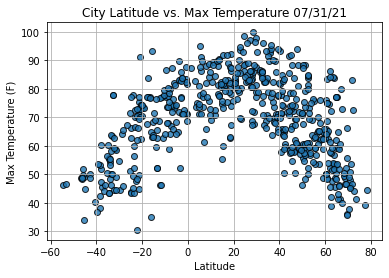

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

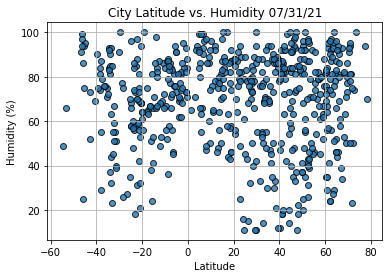

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

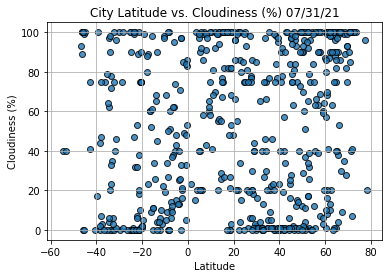

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

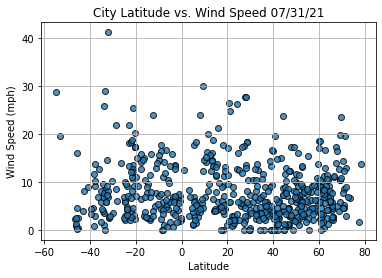

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [20]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

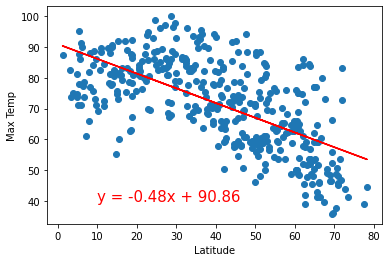

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

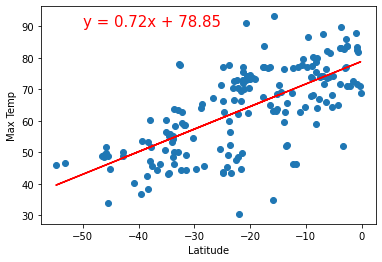

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

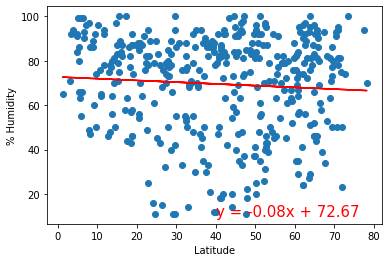

In [29]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

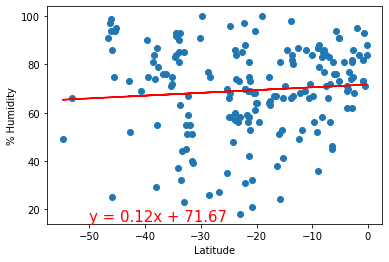

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

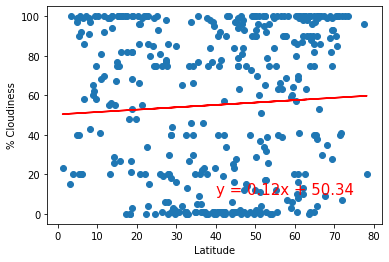

In [30]:
# Linear regression on the Northern Hemisphere (CLOUDS)
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

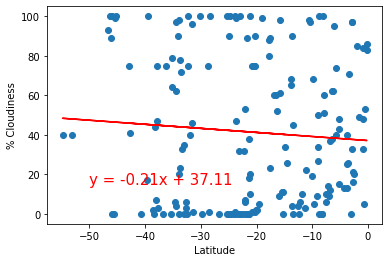

In [31]:
# Linear regression on the Southern Hemisphere (CLOUDS)
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,15))

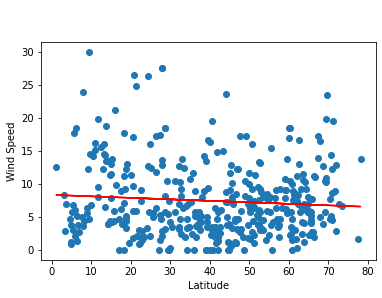

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

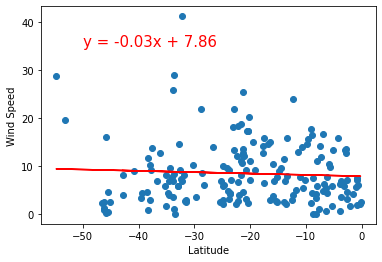

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))